In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, pi
from json_function import read_filejson

In [2]:
def build_data_obj(fps=30):
    # data from track_centroid.json
    data_centroid = read_filejson(file_path="tmp/track_centroid.json")
    vals_centroid = list( data_centroid.values() )
    val_centroid = vals_centroid[0].copy()  # this only handle single object
    
    # data from track_vector.json
    data_vector = read_filejson(file_path="tmp/track_vector.json")
    vals_vector = list( data_vector.values() )
    val_vector = vals_vector[0].copy()  # this only handle single object

    # calculate time per frame
    time = 1 / fps

    # create new obj to store all data
    obj = {}

    # create new KEY: "frame" and "time" in object
    obj["frame"] = []
    obj["time"] = []
    # create new KEY: "xc" and "yc" in object
    obj["xc"] = []
    obj["yc"] = []
    # create new KEY: "xc" and "yc" in object
    # Iam not use update() because handling same length issue
    obj["speed"] = []
    obj["acceleration"] = []
    obj["theta"] = []

    # append data to obj
    for i in range( len(val_centroid) ):
        obj["frame"].append( i )
        obj["time"].append( i*time )
        obj["xc"].append( val_centroid[i][0] )
        obj["yc"].append( val_centroid[i][1] )
        obj["speed"].append( val_vector["speed"][i] )
        obj["acceleration"].append( val_vector["acceleration"][i] )
        obj["theta"].append( val_vector["theta"][i] )

    return obj


data_obj = build_data_obj(fps=24.76)
df = pd.DataFrame(data_obj)
df

,frame,time,xc,yc,speed,acceleration,theta
0,0,0.000000,134,527,0.000000,0.000000,-90.000000
1,1,0.033333,143,524,234.893985,5815.975059,18.434949
2,2,0.066667,152,524,222.840000,5517.518400,-0.000000
3,3,0.100000,159,528,199.621502,4942.628386,-29.744881
4,4,0.133333,164,534,193.381782,4788.132922,-50.194429
...,...,...,...,...,...,...,...
602,602,20.066667,1670,553,70.031856,1733.988745,45.000000
603,603,20.100000,1671,560,126.251723,3125.992665,-11.309932
604,604,20.133333,1675,556,175.079639,4334.971862,-81.869898
605,605,20.166667,1688,550,140.063711,3467.977490,45.000000


In [3]:
def add_vector_component_to_obj(obj, param="speed", add_key=["vx", "vy"]):
    # add key to obj
    for key in add_key:
        obj[key] = []

    # assign value to the new key
    for i in range( len(obj[param]) ):
        # get vector components
        num = obj[param][i]
        theta = obj["theta"][i]
        ex = num * cos(theta * pi / 180)      # convert theta_degree to theta_radian
        ey = num * sin(theta * pi / 180)      # convert theta_degree to theta_radian
        
        # append data to list: obj[key]
        obj[add_key[0]].append(ex)
        obj[add_key[1]].append(ey)

    return obj


data_obj = add_vector_component_to_obj(data_obj, param="speed", add_key=["vx", "vy"])
df = pd.DataFrame(data_obj)
df

,frame,time,xc,yc,speed,acceleration,theta,vx,vy
0,0,0.000000,134,527,0.000000,0.000000,-90.000000,0.00,-0.00
1,1,0.033333,143,524,234.893985,5815.975059,18.434949,222.84,74.28
2,2,0.066667,152,524,222.840000,5517.518400,-0.000000,222.84,-0.00
3,3,0.100000,159,528,199.621502,4942.628386,-29.744881,173.32,-99.04
4,4,0.133333,164,534,193.381782,4788.132922,-50.194429,123.80,-148.56
...,...,...,...,...,...,...,...,...,...
602,602,20.066667,1670,553,70.031856,1733.988745,45.000000,49.52,49.52
603,603,20.100000,1671,560,126.251723,3125.992665,-11.309932,123.80,-24.76
604,604,20.133333,1675,556,175.079639,4334.971862,-81.869898,24.76,-173.32
605,605,20.166667,1688,550,140.063711,3467.977490,45.000000,99.04,99.04


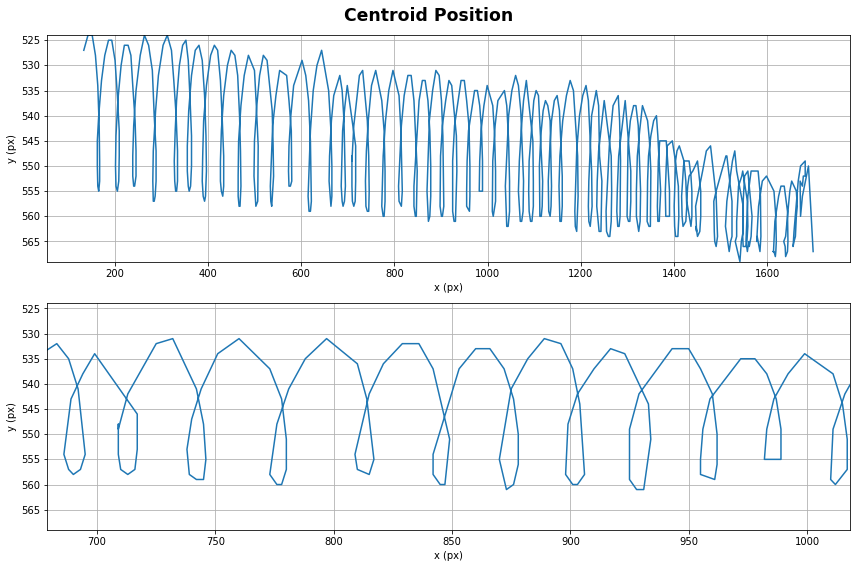

In [4]:
def plot_centroid_data(obj):
    x = obj["xc"]
    y = obj["yc"]

    fig, axs = plt.subplots(2, figsize=(12,8))
    fig.suptitle("Centroid Position", size="xx-large", weight="bold")
    
    for ax in axs:
        ax.plot(x, y)
        ax.set_ylim(max(y), min(y))     # reverse y axis
        ax.set(xlabel="x (px)", ylabel="y (px)")
        # ax.label_outer()        # Hide x labels and tick labels for top plots and y ticks for right plots.
        ax.grid(True)

    axs[1].set_xlim(int(max(x)*2/5), int(max(x)*3/5))
    
    plt.tight_layout()
    
    # save it
    try:    # for notebook environment
        fig.savefig("../media/plot_centroid.jpg")
        plt.show()
    except:     # for local python environment
        fig.savefig("media/plot_centroid.jpg")


plot_centroid_data(data_obj)

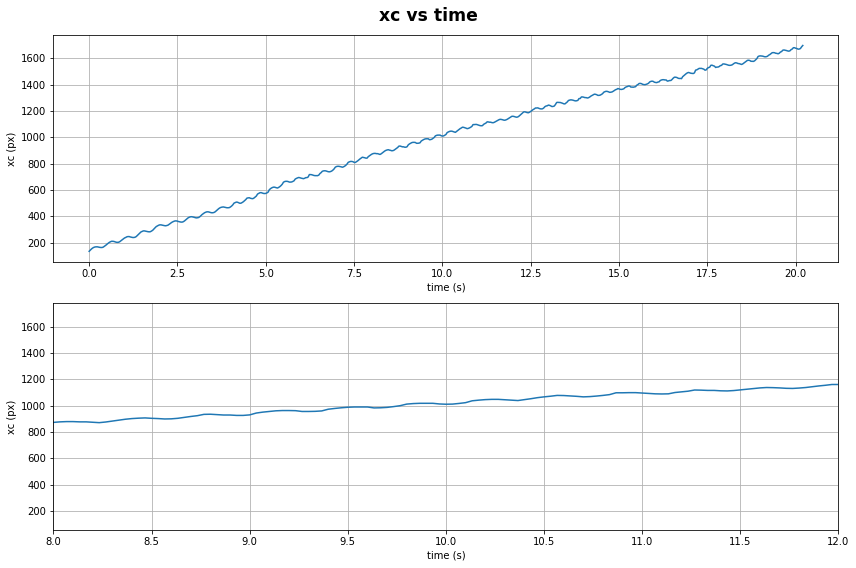

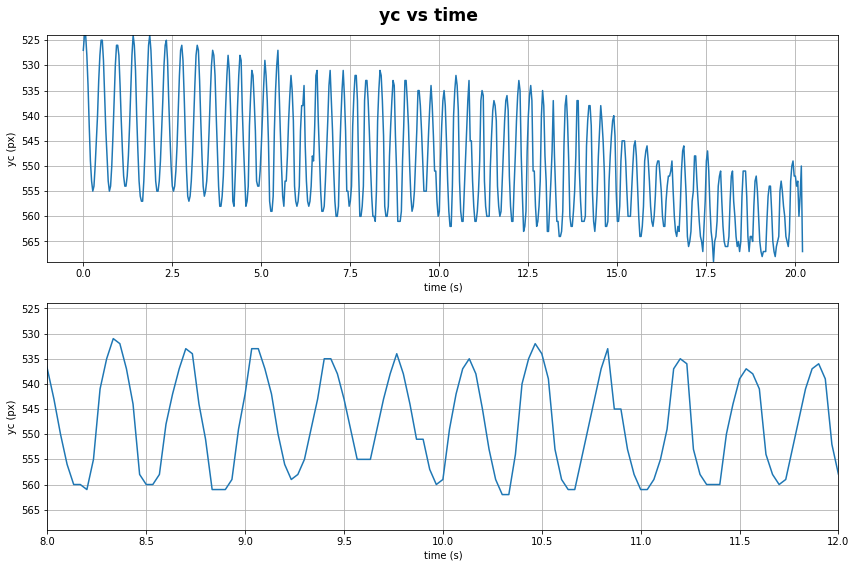

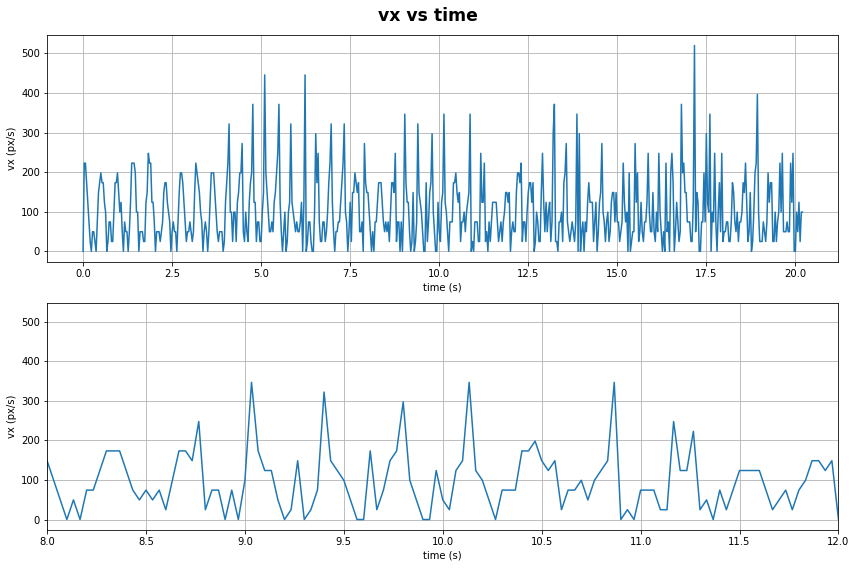

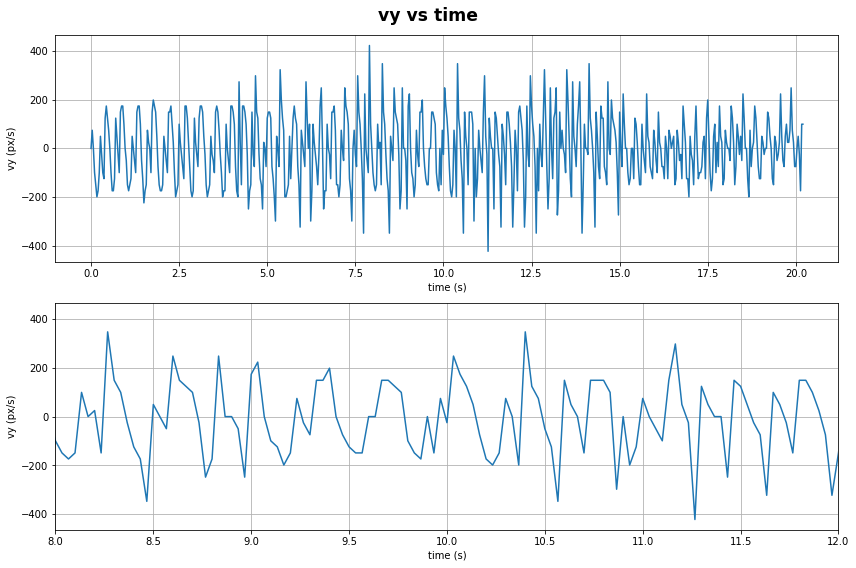

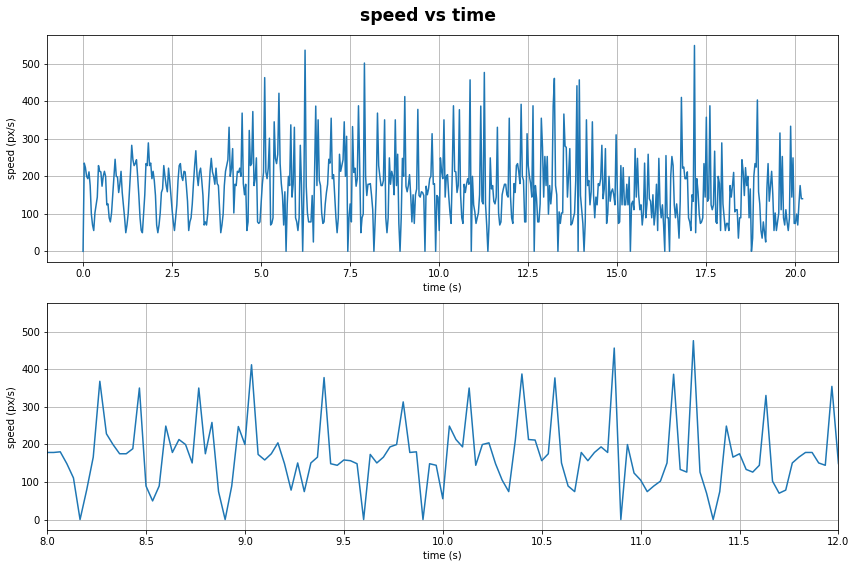

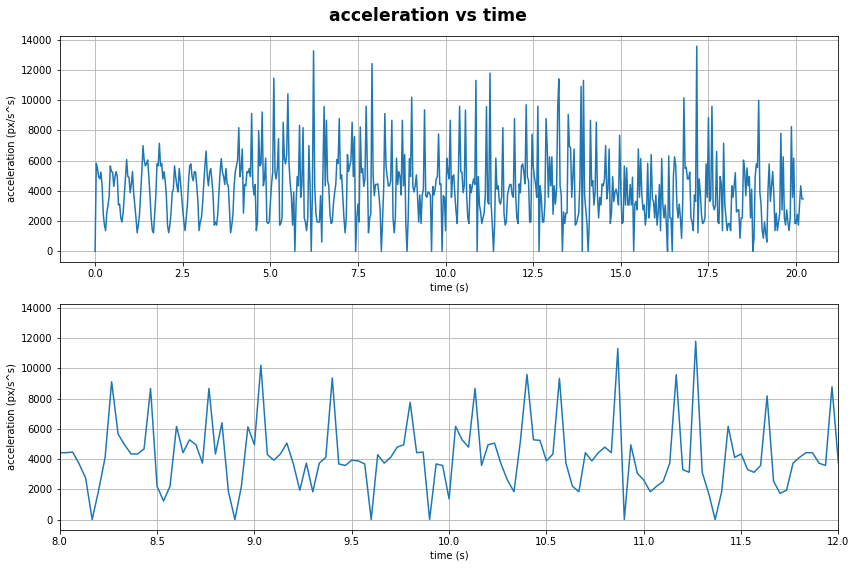

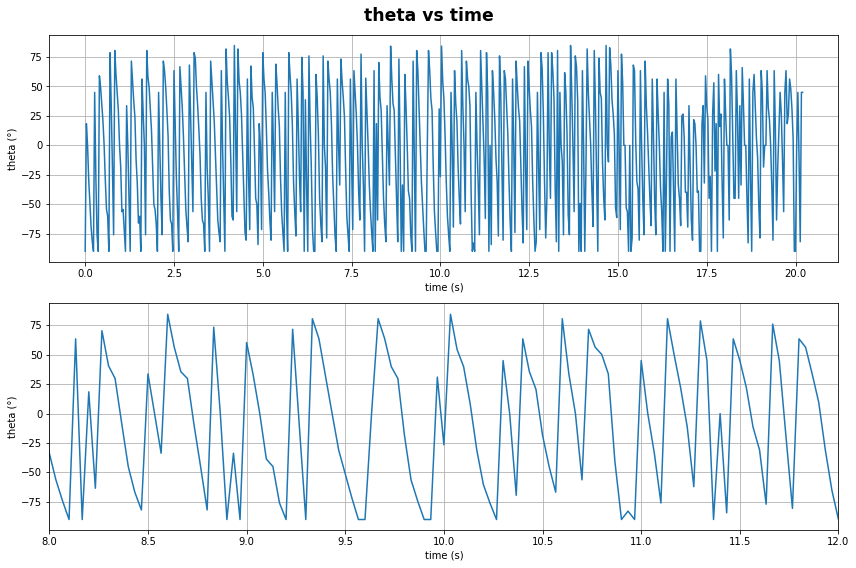

In [5]:
def plot_param_per_time(obj, params=["xc", "yc", "speed", "acceleration"]):
    # define x_data for plotting
    x = obj["time"]

    # define y_data for every plot
    for param in params:
        y = obj[param]

        # define figure and axis
        # I want to plot curve in (1) full range x axis, (2) middle range x axis
        fig, axs = plt.subplots(nrows=2, figsize=(12,8))
        suptitle_text = "%s vs time" %param
        fig.suptitle(suptitle_text, size="xx-large", weight="bold")
        
        # plotting every data
        for ax in axs:
            ax.plot(x, y)
            ax.grid(True)

            # set label
            ax.set_xlabel("time (s)")
            if param in ["xc", "yc"]:
                ax.set_ylabel("%s (px)" %param)
            elif param in ["speed", "vx", "vy"]:
                ax.set_ylabel("%s (px/s)" %param)
            elif param in ["acceleration", "ax", "ay"]:
                ax.set_ylabel("%s (px/s^s)" %param)
            elif param == "theta":
                ax.set_ylabel("%s (°)" %param)

            # set axis limit
            if param == "yc":
                ax.set_ylim(max(y), min(y))     # reverse y axis

            # set x limit for subplots in row=1, set limit in midle range
            if ax == axs[len(axs)-1]:
                ax.set_xlim(int(max(x)*2/5), int(max(x)*3/5))

        plt.tight_layout()

        # save it
        try:    # for notebook environment
            fig.savefig("../media/plot_%s.jpg" %param)
            plt.show()
        except:     # for local python environment
            fig.savefig("media/plot_%s.jpg" %param)


params=["xc", "yc", "vx", "vy", "speed", "acceleration", "theta"]
plot_param_per_time(data_obj, params=params)

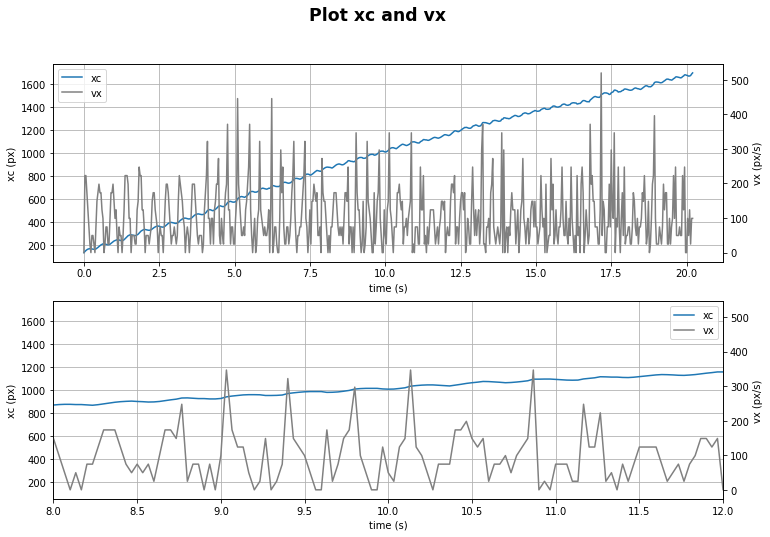

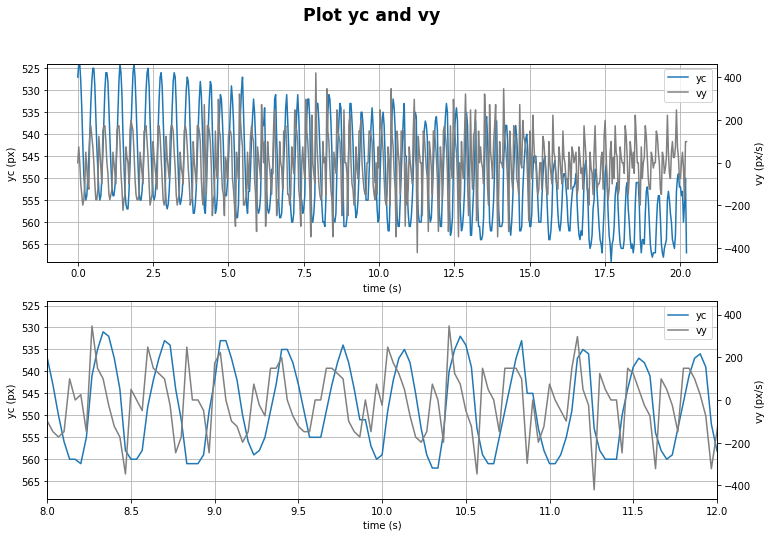

In [6]:
# plot position, velocitiy, and acceleration in a graph
def plot_params_in_one_graph(obj, params=["xc", "vx"]):  
    # define figure and axis. I only want to have 1 figure
    # I want to plot curve in (1) full range x axis, (2) middle range x axis
    fig, axs = plt.subplots(nrows=2, figsize=(12,8))
    suptitle_text = "Plot %s and %s" %(params[0], params[1])
    fig.suptitle(suptitle_text, size="xx-large", weight="bold")

    # define x y data for plotting
    x = obj["time"]
    y1 = obj[params[0]]
    y2 = obj[params[1]]

    # plotting every data
    for ax in axs:
        l1, = ax.plot(x, y1)

        ax2 = ax.twinx()
        l2, = ax2.plot(x, y2, color="gray")

        ax.grid(True)

        # set label
        ax.set_xlabel("time (s)")
        ax.set_ylabel("%s (px)" %params[0])
        ax2.set_ylabel("%s (px/s)" %params[1])

        # set axis limit
        if "yc" in params:
            ax.set_ylim(max(y1), min(y1))     # reverse y axis

        # set x limit for subplots in row=1, set limit in midle range
        if ax == axs[len(axs)-1]:
            ax.set_xlim(int(max(x)*2/5), int(max(x)*3/5))
                

        ax.legend([l1, l2], [params[0], params[1]])


    # save it
    try:    # for notebook environment
        fig.savefig("../media/plot_%s_%s.jpg" %(params[0], params[1]))
        plt.show()
    except:     # for local python environment
        fig.savefig("media/plot_%s_%s.jpg" %(params[0], params[1]))


params = ["xc", "vx"]
plot_params_in_one_graph(data_obj, params=params)

params = ["yc", "vy"]
plot_params_in_one_graph(data_obj, params=params)